<a href="https://colab.research.google.com/github/restful3/ds4th_study/blob/main/source/%EB%B0%91%EB%B0%94%EB%8B%A5%EB%B6%80%ED%84%B0_%EC%8B%9C%EC%9E%91%ED%95%98%EB%8A%94_%EB%94%A5%EB%9F%AC%EB%8B%9D/ch3_%EC%8B%A0%EA%B2%BD%EB%A7%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 3.신경망

- 기존에 배운 단층 퍼셉트론은
    + 복잡한 함수도 처리할 수 있으나
    + 여전히 가중치를 사람이 설정하는 과정 거침

## 1. 퍼셉트론에서 신경망으로

### 1.1 신경망의 예
다음의 그림처럼 신경망은 입력층 은닉층 출력층, 즉 3개 층으로 기본 구성.<br>
가중치를 갖는 층은 2개 뿐이기에 2층 신경망이라 불릴때도 있음 <br>
<img src="https://drive.google.com/uc?id=1N8Zr6cOt93kRdpFfrJrbvDRNDJXddzvj" width=500 height=500>





### 1.2 퍼셉트론복습
<img src="https://drive.google.com/uc?id=1NQr8K0BKEF27VvRGcMkbP37LPKv1lbgn" width=410 ><br>
그림3-2는 x1, x2 두신호를 받아 y를 출력하는 퍼셉트론, 수식으로는 다음과 같음

> $ y = 0 (b+w_1x_1+w_2x_2 <=0)$ <br>
> $ y = 1 (b+w_1x_1+w_2x_2 >0)$ <br>

- b는 편향 : 뉴런이 얼마나 쉽게 활성화 되는가 제어
- $w_1, w_2$는 각신호의 가중치로 각 신호의 영향력 제어

그런데 3-2 그림에서는 편향이 보이지 않으므로 편향을 명시하여 그림 그려보면 다음과 같음<br>
<img src="https://drive.google.com/uc?id=1NGTFaWUFaeI1Y_P8YFjLPFeFP3a2GiVs" width=500 height=500><br>

### 1.3 활성화 함수의 등장


이 퍼셉트론은 $x_1,x_2,1$ 이라는 3개의 신호가 뉴런에 전달되어 각 신호의 가중치를 곱한 후 다음 뉴런에 전달.
- 다음 뉴런에서 이신호의 값을 더하여 그합이 0을 넘으면 1, 아니면 0 출력

<br><h4>이처럼 입력신호의 총합을 출력신호로 변환하는 함수를 <b><h3>활성화함수</h3></b>라고 한다</h4>


<img src="https://drive.google.com/uc?id=1NJuTK-j2ao_MAOzDhD6d_GVvx4_Urofu" width=500 height=500>
뉴런의 계산과정을 자세히 나타냄
<img src="https://drive.google.com/uc?id=1N8dLfY9ht5aAB9DPR_mRc544dDNT7GDk" width=1500 height=500>

## 2. 활성화함수
위처럼 임계값을 경계로 출력이 바뀌는것을 계단함수 (step function)이라 한다. 신경망에서 자주 이용되는 활성화함수인 sigmoid와비교하여 살펴보자


### 2.1 계단함수 구현
- 임계값을 기준으로 0 또는 1이라...극단적 : 두가지 선택을 보여줌

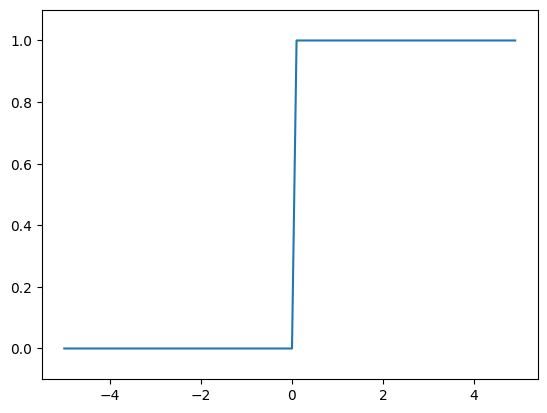

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# numpy 배열을 위한 구현
def step_function(x):
    # y = x > 0
    # return y.astype(np.int)
    return np.array(x > 0, dtype=np.int)


# 3.2.3 계단 함수의 그래프
x = np.arange(-5.0, 5.0, 0.1) # -5~5까지 0.1 간격으로 구현
y = step_function(x)

plt.plot(x, y)
plt.ylim(-0.1, 1.1)  # y축의 범위 지정
plt.show()


### 2.2 시그모이드 구현

- $  h(x) = \frac{1}{1+exp(-x)}$

exp(-x)는 $e^{-x}$로 e는 자연상수 (2.71812...), 시그모이드는 확률 0~1사이의 값을 연속형으로 연결
- x에 비례하여 y의 확률값을 보여줌

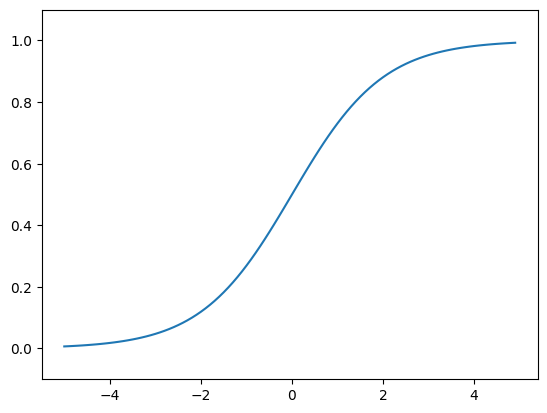

In [ ]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))


x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)

plt.plot(x, y)
plt.ylim(-0.1, 1.1)  # y축의 범위 지정
plt.show()


### 2.3 활성화함수의 공통점은?

비선형함수라는 점임 : 신경망에서는 선형함수를 활성화함수로 사용해서는 안됨
- 그러면 선형으로만 계산되어 신경망의 층을 깊게 하는 의미가 없어짐
    - 예> h(x) = cx 를 활성화함수로 사용시, 3층네트워크 y(x) = h(h(h(x))) = $c^x$ 으로만 계산되면 끝

### 2.4 Relu 구현
최근에 가장 많이 쓰이는 활성화함수로 <br>
입력이 0을 넘으면 그대로 출력, 0 이하면 0을 출력

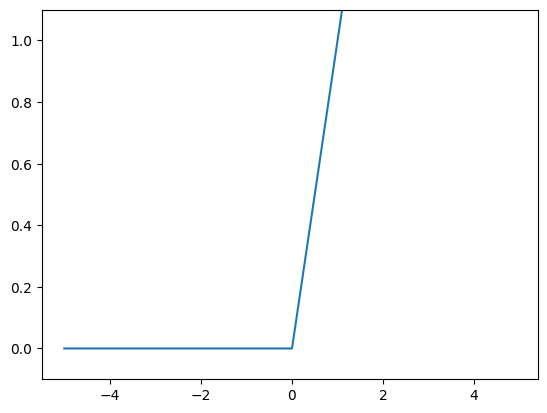

In [ ]:
def relu(x):
    return np.maximum(0, x)

x = np.arange(-5.0, 5.0, 0.1)
y = relu(x)

plt.plot(x, y)
plt.ylim(-0.1, 1.1)  # y축의 범위 지정
plt.show()

## 3. 다차원 배열의 계산

### 3.1 다차원 배열
- 다차원 배열도 그 기본은 숫자의 집합.
    - 숫자가 일렬로 늘어선것이나 직사각형으로 늘어놓은 것, 3차원으로 늘어놓은것...모두 통틀어 다차원배열이라 함

In [ ]:
A = np.array([1, 2, 3, 4])
print(A)  # [1 2 3 4]
print(np.ndim(A))  # 1
print(A.shape)  # (4,)

[1 2 3 4]
1
(4,)


In [ ]:
B = np.array([[1, 2], [3, 4], [5, 6]])
print(B)
print(np.ndim(B))  # 2
print(B.shape)  # (3, 2)


[[1 2]
 [3 4]
 [5 6]]
2
(3, 2)


In [ ]:
# 3.3.2 행렬의 내적(행렬 곱/스칼라 곱)
A = np.array([[1, 2], [3, 4]])
B = np.array([[5, 6], [7, 8]])
print(np.dot(A, B))

[[19 22]
 [43 50]]


In [ ]:
A = np.array([[1, 2, 3], [4, 5, 6]])  # (2, 3)
B = np.array([[1, 2], [3, 4], [5, 6]])  # (3, 2)
print(np.dot(A, B))  # (2, 2)

[[22 28]
 [49 64]]


In [ ]:
X = np.array([1, 2])  # (2,)
print(X)
print(X.shape)
print()

W = np.array([[1, 3, 5], [2, 4, 6]])  # (2, 3)
print(W)
print(W.shape)
print()

Y = np.dot(X, W)
print(Y)  # [5 11 17]
print(Y.shape)  # [5 11 17]

[1 2]
(2,)

[[1 3 5]
 [2 4 6]]
(2, 3)

[ 5 11 17]
(3,)


## 4. 3층 신경망 구현하기
- 신경망에서의 계산을 행렬계산으로 정리 가능.
> 신경망의 각 층의 계산은 행렬의 곱으로 처리할 수 있음



- 입력층(0층) 2개, 첫 번째 은닉층(1층) 3개, 두 번째 은닉층(2층) 2개, 출력층(3층) 2개의 뉴런으로 구성.
    - 1, 2층의 활성화 함수 : 시그모이드
    - 3층의 활성화 함수 : 항등함수

- 출력층의 활성화 함수는 풀고자 하는 문제의 성질에 맞게 정한다.
    - 예를 들어 회귀에는 항등함수, 2클래스 분류에는 시그모이드 함수,
    - 다중 클래스 분류에는 소프트맥스 함수를 사용하는 것이 일반적
<br>



### 4.1 표기법
<그림 3-16> 중요한 표기 표기
가중치(w), 은닉층(a)의 오른쪽위에는 $^{(1)}$이 붙어있으며 이는 1층의 가중치, 은닉층을 뜻함<br>
가중치의 아래에 붙은 두숫자는 각 앞의 뉴런번호, 뒤의 뉴런번호를 뜻함


### 4.2 각 층의 신호 전달 구현하기
입력층에서 1층 첫번째 뉴런으로 가는 신호를 살펴보면 그림과 같음
<br>
<그림 3-17>
<br>
편향을 뜻하는 뉴런인 ①이 추가됨. 수식으로 나타내면
> $a_1^{(1)} = w_11^{(1)}+w_12^{(1)}+b_1^{(1)}$<br>
간소화 하면 $A^{(1)}=XW^{(1)}+B^{(1)}$

이 수식을 구현해보면,


### 4.3 구현 정리

In [ ]:
import numpy as np
# 시그모이드함수
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# 항등함수
def identity_function(x):
    return x


# 신경망 구성
def init_network():
    network = {}
    network['W1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
    network['b1'] = np.array([0.1, 0.2, 0.3])
    network['W2'] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
    network['b2'] = np.array([0.1, 0.2])
    network['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]])
    network['b3'] = np.array([0.1, 0.2])

    return network

# 포워드 정의
def forward(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = identity_function(a3)
    return y

network = init_network()
x = np.array([1.0, 0.5])
y = forward(network, x)  # [ 0.31682708  0.69627909]

print(y)

[0.31682708 0.69627909]


## 5. 출력층 설계하기
- 신경망은 분류와 회귀 모두에 이용할 수 있음 다만 둘중 어떤 문제냐에 따라 출력층에서 사용하는 활성화함수 차이
    - 회귀분류에는 항등함수, 분류에는 소프트맥스 함수 사용
    


### 5.1 항등함수와 소프트맥스 함수 구현하기
> 항등 함수 (identity function) : 입력을 그대로 출력 <br><br>
> 소프트맥스 함수 (softmax function)<br>
$yk = \frac{exp(a_k)}{\sum\limits_{i=1}^{n}exp(a_i)}$

softmax 구하는 과정

In [ ]:
a= np.array([0.3,2.9,4.0])
exp_a= np.exp(a) # 지수함수
print(exp_a)

[ 1.34985881 18.17414537 54.59815003]


In [ ]:
sum_exp_a = np.sum(exp_a)
print(f"지수함수의 합 : {sum_exp_a}")
print(f"지수함수의 비율(softmax) : {exp_a/sum_exp_a}")

지수함수의 합 : 74.1221542101633
지수함수의 비율(softmax) : [0.01821127 0.24519181 0.73659691]


함수로 정리하면

In [ ]:
def softmax(a):
    exp_a= np.exp(a) # 지수함수
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a

    return y

### 5.2 소프트맥스 구현 시 주의점
소프트맥스 함수는 지수함수를 사용하기 때문에 아주 큰 값을 사용하게 되고,<br>
오버플로로 인해 결과 수치가 불안정해질 수 있다.<br>
분자분모에 특정 수치(일반적으로 최대값)을 곱해줘서 결과를 보정한다.

In [ ]:
print(softmax(np.array([1010, 1000, 990])))

[nan nan nan]


C:\Users\David\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
C:\Users\David\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.


오버플로 인하여 제대로 계산 안됨

In [ ]:
def softmax_fix(a):
    c = np.max(a)
    exp_a = np.exp(a - c)  # 오버플로 대책
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a

    return y

In [ ]:
print(softmax_fix(np.array([1010, 1000, 990])))

[9.99954600e-01 4.53978686e-05 2.06106005e-09]


### 5.3 소프트맥스 함수의 특징

- 출력은 0에서 1사이의 실수이며 출력의 총합은 1이다.
    - 따라서 출력을 확률로 해석할 수 있다.
    - 단, 원소의 대소 관계는 변하지 않기 때문에 자원 낭비를 줄이기 위해 생략하기도 한다.

- 기계 학습의 문제 풀이는 학습과 추론의 두 단계로 이루어진다.
    - 추론 단계에서는 출력층의 소프트맥스 함수를 생략하는 것이 일반적이며,
    - 학습시킬때는 출력층에서 소프트맥스 함수를 사용

In [ ]:
a = np.array([0.3, 2.9, 4.0])
y = softmax(a)
print(y)  #
print(np.sum(y))  # 1.0

[0.01821127 0.24519181 0.73659691]
1.0


### 5.4 출력층의 뉴런 수 정하기
- 출력층의 뉴런 수는 풀려는 문제에 맞게 적절히 정해야 한다.
    - 분류에서는 분류하고 싶은 클래스 수로 설정

## 6. 손글씨 숫자 인식
구조를 모두 배웠으니 실전예제를 보자

In [ ]:
!pip install python-mnist

In [ ]:
import sys
import os
import pickle
import numpy as np
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
from dataset.mnist import load_mnist
from common.functions import sigmoid, softmax


# 3.6.1 MNIST 데이터셋
'''
0~9 숫자 이미지로 구성.
훈련 이미지 60000장, 시험 이미지 10000장
28*28 크기의 회색조 이미지이며 각 픽셀은 0~255의 값을 가짐
레이블은 정답에 해당하는 숫자
'''
# 처음 한 번은 몇 분 정도 걸림
# 이미지를 numpy 배열로 저장
# flatten : 입력 이미지를 평탄화(1차원 배열로)
# normalize : 입력 이미지를 정규화(0.0~1.0 사이의 값으로)
# one_hot_label : 레이블을 원-핫 인코딩 형태로 저장
(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True,
                                                  normalize=False)

# 각 데이터의 형상 출력
print(x_train.shape)  # (60000, 784)
print(t_train.shape)  # (60000,)
print(x_test.shape)  # (10000, 784)
print(t_test.shape)  # (10000,)


ModuleNotFoundError: No module named 'dataset.mnist'

## 7.정리

지금까지 신경망의 순전파 (순방향의 전파)를 살펴보았습니다.
- 각 층의 뉴런이 다음 층의 뉴런으로 신호를 전달 하는 면에서 퍼셉트론과 동일
- 다음 뉴런으로 갈 때 신호를 발생시키는 활성화 함수 차이
    - 퍼셉트론 : 계단함수를 활성화 함수로 사용
    - 신경망 : 시그모이드, relu 등 사용